# Imports

In [ ]:
pip install xgboost

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import xgboost as xgb


# Loading the Data 

In [2]:
online_np = pd.read_csv(r'C:\Users\Desktop\Capstone 2_OnlinePopularity\newspopularity.csv')

In [3]:
online_np.head()

,Unnamed: 0,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,DatePublished
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,"['January 7, 2013']"
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,"['January 7, 2013']"
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,"['January 7, 2013']"
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,"['January 7, 2013']"
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,"['January 7, 2013']"


# Preprocessing 

In [4]:
#Dropping columns:"unnamed: 0" and "url"
online_np = online_np.drop(columns=['Unnamed: 0','url'])

In [5]:
# Removing []
online_np['DatePublished'] = online_np['DatePublished'].str.strip('[]')

In [6]:
# Removong ''
online_np['DatePublished'] = online_np['DatePublished'].str.strip("''")

In [7]:
online_np.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,DatePublished
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,"January 7, 2013"
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,"January 7, 2013"
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,"January 7, 2013"
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,"January 7, 2013"
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,"January 7, 2013"


In [8]:
# Converting DatePublished column from string to datetime 
online_np['DatePublished'] = pd.to_datetime(online_np.DatePublished)

In [9]:
online_np['DatePublished'].dtype

dtype('<M8[ns]')

In [10]:
# Setting Date Published as index 
online_np.set_index('DatePublished', inplace=True)
online_np.sort_index(inplace=True)

In [11]:
# Earliest article dates 
online_np.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
DatePublished,,,,,,,,,,,,,,,,,,,,,
2013-01-07,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593
2013-01-07,731.0,8.0,130.0,0.821705,1.0,0.922078,7.0,4.0,0.0,0.0,...,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300
2013-01-07,731.0,9.0,474.0,0.608602,1.0,0.802158,11.0,0.0,1.0,0.0,...,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100
2013-01-07,731.0,10.0,555.0,0.535390,1.0,0.708824,7.0,6.0,1.0,0.0,...,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600
2013-01-07,731.0,9.0,1115.0,0.424132,1.0,0.564539,21.0,21.0,20.0,0.0,...,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400


In [12]:
# Latest article dates
online_np.tail()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
DatePublished,,,,,,,,,,,,,,,,,,,,,
2023-05-24,193.0,9.0,713.0,0.416667,1.0,0.542923,11.0,5.0,3.0,0.0,...,0.100000,0.800000,-0.214484,-0.8,-0.033333,0.700000,0.366667,0.200000,0.366667,3600
2023-05-28,647.0,10.0,439.0,0.591549,1.0,0.746269,17.0,2.0,11.0,0.0,...,0.100000,0.600000,-0.289815,-0.6,-0.075000,0.450000,0.133333,0.050000,0.133333,805
2023-07-20,364.0,12.0,277.0,0.635688,1.0,0.776471,8.0,3.0,2.0,0.0,...,0.062500,0.500000,-0.218519,-0.4,-0.100000,0.000000,0.000000,0.500000,0.000000,595
NaT,448.0,7.0,172.0,0.525316,1.0,0.481203,3.0,2.0,11.0,1.0,...,0.285714,0.433333,-0.343750,-0.5,-0.187500,0.833333,0.433333,0.333333,0.433333,2700
NaT,21.0,13.0,363.0,0.600000,1.0,0.755760,13.0,6.0,1.0,0.0,...,0.100000,0.500000,-0.340179,-1.0,-0.071429,0.200000,0.050000,0.300000,0.050000,6800


In [13]:
# DF of article date and share 
date_shares = online_np['shares']
ds = date_shares.loc[date_shares.index <= '12-31-2014']

In [14]:
# Creating dataframe
ds = pd.DataFrame(ds)
ds.head()

,shares
DatePublished,
2013-01-07,593
2013-01-07,1300
2013-01-07,1100
2013-01-07,1600
2013-01-07,2400


# Train / Test Split 

##### Splitting dataset into training and test 

In [15]:
train = ds.loc[ds.index < '09-01-2014']
test = ds.loc[ds.index >= '09-01-2014']

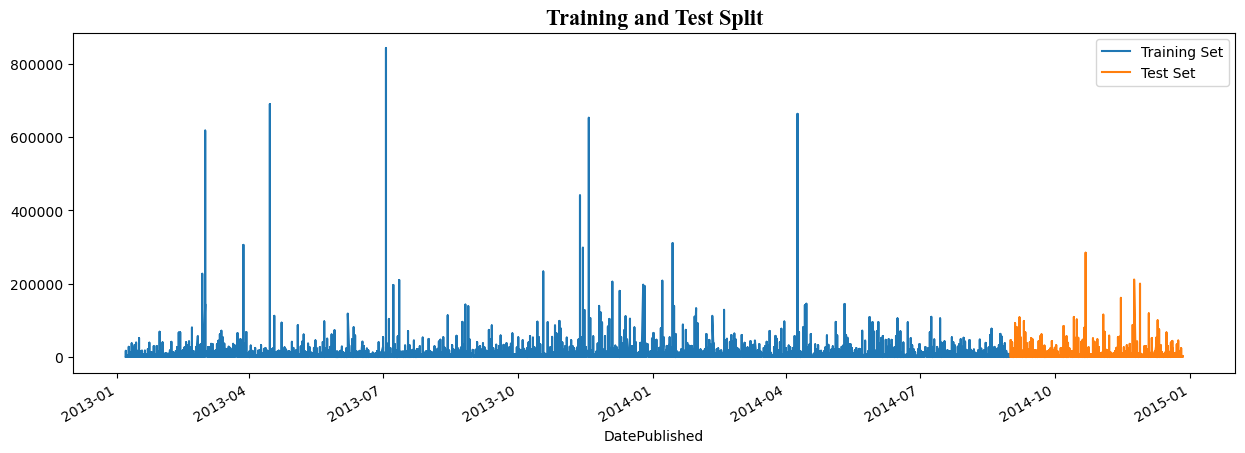

In [18]:
#Plotting train and test split 
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label="Test Set")
plt.title('Training and Test Split', fontsize=16, fontname="Times New Roman", fontweight="bold")
ax.legend(['Training Set', 'Test Set'])
plt.show()

#####  Cross Validation for Training 

In [19]:
from sklearn.model_selection import TimeSeriesSplit

In [20]:
# Creating time-series split 
tss = TimeSeriesSplit(n_splits=3, test_size=24*365*1, gap=24)
df = ds.sort_index()

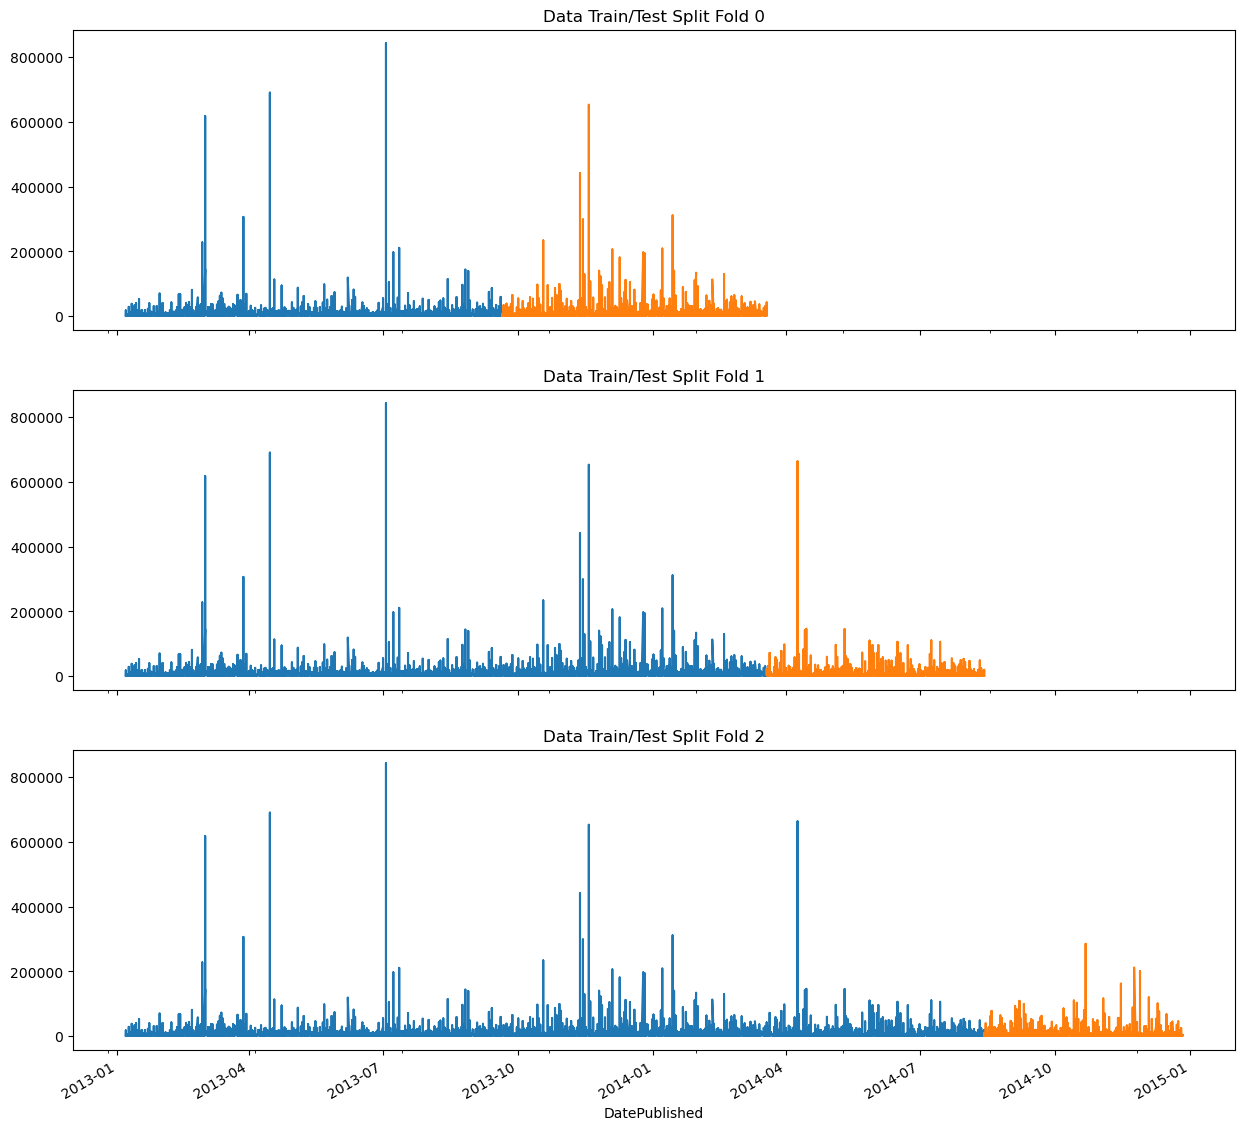

In [21]:
# Cross Validation Folds 
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['shares'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['shares'].plot(ax=axs[fold],
                         label='Test Set')
    fold += 1
plt.show()
   

###### Feature Creation for Model 

In [30]:
def createfeatures(df):
    """
    Creating time series features based on time series index
    """
    df = df.copy()
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day of week'] = df.index.dayofweek
    return df


In [31]:
df = createfeatures(ds)

In [32]:
df.head()

,shares,day,month,year,day of week
DatePublished,,,,,
2013-01-07,593,7,1,2013,0
2013-01-07,1300,7,1,2013,0
2013-01-07,1100,7,1,2013,0
2013-01-07,1600,7,1,2013,0
2013-01-07,2400,7,1,2013,0


# Modeling

In [28]:
train = createfeatures(train)
test = createfeatures(test)

FEATURES = ['day','month','year','day of week','week of year']
TARGET = 'shares'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

### XGBoost Regression

In [34]:
tss = TimeSeriesSplit(n_splits=3, test_size=24*365*1, gap=24)
df = df.sort_index()


fold = 0
preds = []

for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = createfeatures(train)
    test = createfeatures(test)

    FEATURES = ['day','month','year','day of week']
    TARGET = 'shares'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=500,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=50)


[13:02:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:13443.74289	validation_1-rmse:14337.26808
[50]	validation_0-rmse:13158.74615	validation_1-rmse:14059.59721
[100]	validation_0-rmse:13048.71885	validation_1-rmse:13954.99808
[150]	validation_0-rmse:13001.00014	validation_1-rmse:13918.79661
[200]	validation_0-rmse:12980.89999	validation_1-rmse:13902.60054
[250]	validation_0-rmse:12969.45884	validation_1-rmse:13900.65256
[278]	validation_0-rmse:12964.77544	validation_1-rmse:13903.13677
[13:02:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:13802.13686	validation_1-rmse:10424.01048
[50]	validation_0-rmse:13498.02472	validation_1

### Evautation Metrics

###### Mean Squared Error 

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
y_pred = reg.predict(X_test)

score = np.sqrt(mean_squared_error(y_test, y_pred))

In [38]:
print(f'Score across folds: {np.mean(score):0.5f}')
print(f'Fold scores: {score}')

Score across folds: 8071.73367
Fold scores: 8071.733668467614


###### Calcuating Error 

In [39]:
# Best Predicted Days 
test['error'] = np.abs(test[TARGET] - reg.predict(X_test))
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(5)

date
2014-08-22    1202.999897
2014-08-31    1327.289044
2014-10-04    1432.244326
2014-09-25    1444.462454
2014-09-19    1481.215273
Name: error, dtype: float64

In [40]:
# Worst Predicted Days 
test['error'] = np.abs(test[TARGET] - reg.predict(X_test))
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(5)

date
2014-11-28    10573.683249
2014-09-07     7837.112137
2014-11-15     7038.821561
2014-11-24     6847.147433
2014-09-21     5960.752414
Name: error, dtype: float64

# Feature Importance 

In [41]:
importance = reg.feature_importances_

In [42]:
feature_importance =  pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

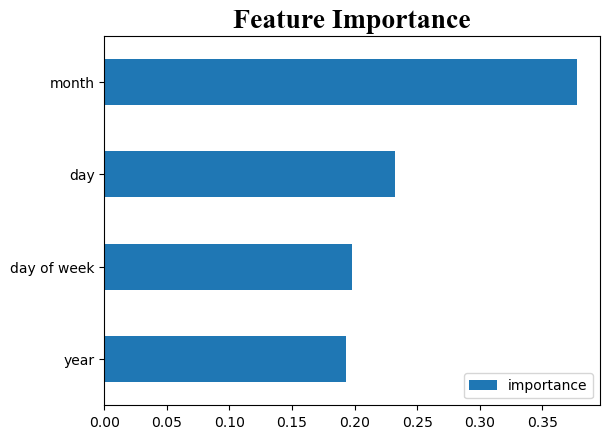

In [44]:
feature_importance.sort_values('importance').plot(kind='barh')
plt.title('Feature Importance',fontname="Times New Roman", fontweight="bold", fontsize=20)
plt.show()

In [71]:
feature_importance.value_counts(ascending=True)

importance
0.193232      1
0.197676      1
0.231834      1
0.377258      1
dtype: int64

# Forecasting 

In [46]:
# Retraining model on all data
df = createfeatures(df)

FEATURES = ['day','month','year','day of week']
TARGET = 'shares'

X_all = df[FEATURES]
y_all = df[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=200,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=25)

[13:05:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:12105.55938
[25]	validation_0-rmse:11914.04783
[50]	validation_0-rmse:11796.37055
[75]	validation_0-rmse:11724.70527
[100]	validation_0-rmse:11680.78093
[125]	validation_0-rmse:11653.48486
[150]	validation_0-rmse:11636.39020
[175]	validation_0-rmse:11625.59997
[199]	validation_0-rmse:11618.95793


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [47]:
df.index.max()

Timestamp('2014-12-27 00:00:00')

In [62]:
# Create future dates 
future = pd.date_range('2014-12-27','2015-12-31')
future 

DatetimeIndex(['2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=370, freq='D')

In [63]:
# Creating Dateframe of future dates 
future = pd.DataFrame(index=future)
future['Future'] = True
df['Future'] = False

#Merge of present and future dates 
dates_future = pd.concat([df, future])
dates_future = createfeatures(dates_future)

In [64]:
future_final = dates_future.query('Future').copy()

###### Predicting the Future 

In [65]:
future_final['pred'] = reg.predict(future_final[FEATURES])

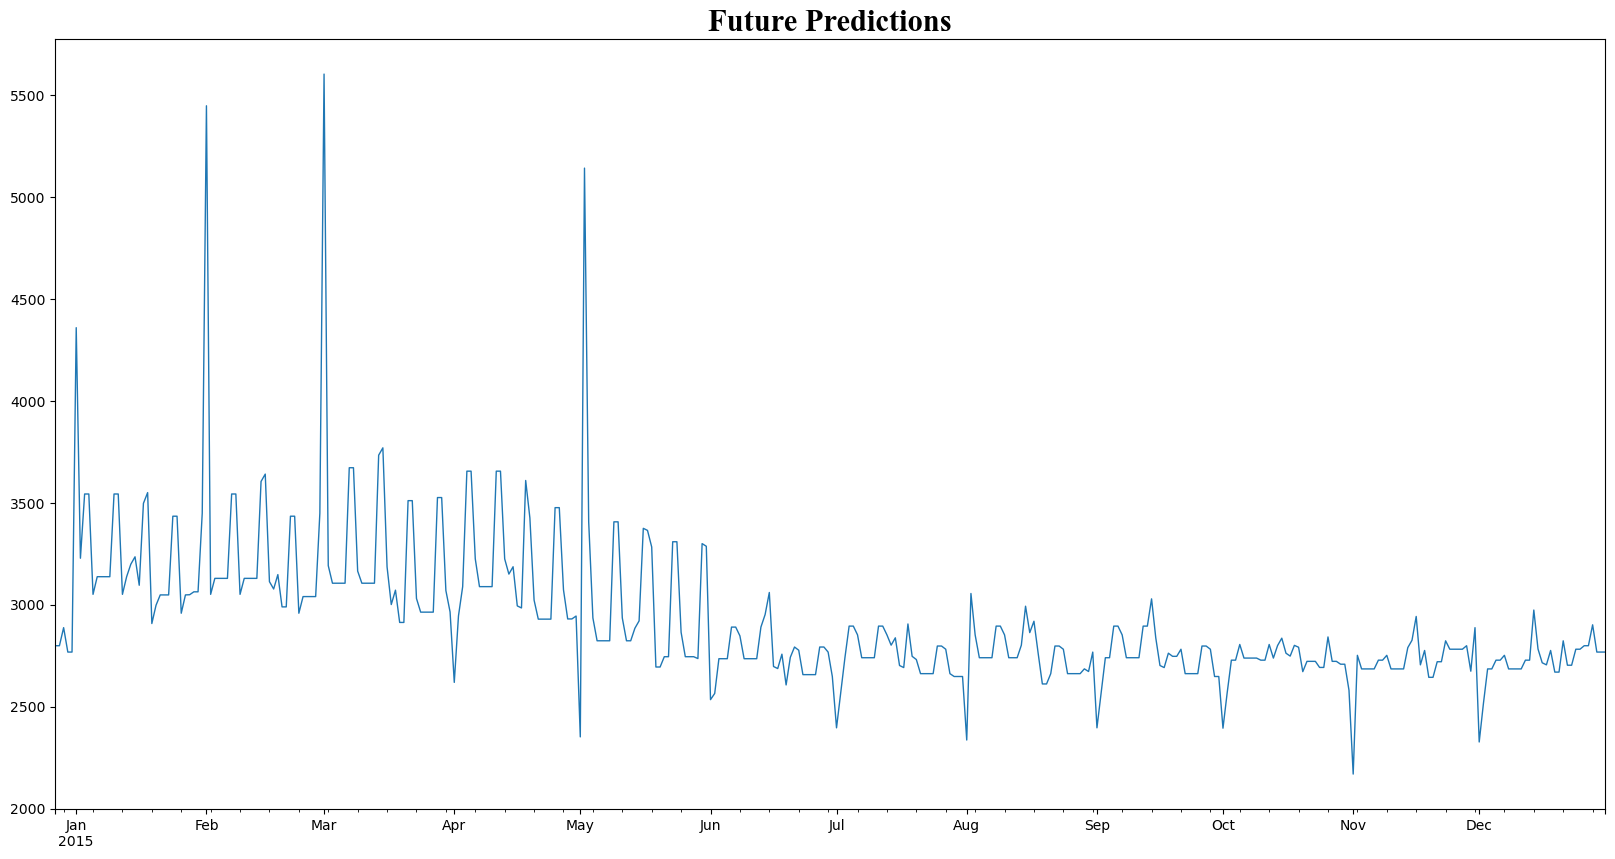

In [68]:
#Plot of future predictions 
future_final['pred'].plot(figsize=(20, 10),ms=1,lw=1)
plt.title('Future Predictions',fontname="Times New Roman", fontweight="bold", fontsize=22)
plt.show()

# Summary 

<u>Pre-processing</u>

To get the dataframe ready for training and modeling a few things needed to be changed. First remove the columns Unnamed: 0',' and ‘url’ as they were not important to the model. Then proceed to change the ‘Date Published’ column from a string to a datetime object. Next set the ‘Date Published’ column as the index of the dataframe. Last, created a dataframe of just the article shares and date published. 

<u>Modeling</u>

I split the data using the date September 1, 2014, as the split. All dates before September 1, 2014, were used for training, and the dates after were used for testing. Used sklearn time series split function to split the data using 3 splits with a 24-hour gap between the dates. Proceed to then cross-validate the dataset. After cross-validation, I created the time series features for the model. The features are day, month, year, and day of week. The model I chose was XGBoost. I evaluated the model using the mean squared error. The model scored 8071.733668467614 in comparison to the scores across the fold which was 8071.73367. The worst predicted days were 8/22/2014, 08/31/2014, 10/04/2014, 09/25/2015, 9/19/2015. The best predicted days were 11/28/2014, 09/07/2014, 11/15/2014, 09/21/2014. Next analyzed feature importance. Month was first in importance followed by day, day of week, and year.  

<u>Forecasting</u>

The future model prediction a decreasing seasonal pattern in 2015. With the lowest shares appearing in November 2015. The highest shares appeared in March 2015. 